In [157]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [158]:
train_df = pd.read_csv("titanic_train.csv", index_col=0)
test_df = pd.read_csv("titanic_test.csv", index_col=0)
test_target_df = pd.read_csv("survival.csv", index_col=0)

In [159]:
train_df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [160]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [161]:
features_train = train_df
features_train["Gender"] = features_train["Sex"] == "male"
features_train = features_train.drop("Sex", axis=1)
features_train

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,True
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,False


In [162]:
features_train = features_train.drop(columns=["Name", "Ticket"], axis=1) #, "Fare", 
features_train


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Gender
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,NaN,S,True
2,1,1,38.0,1,0,71.2833,C85,C,False
3,1,3,26.0,0,0,7.9250,NaN,S,False
4,1,1,35.0,1,0,53.1000,C123,S,False
5,0,3,35.0,0,0,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,NaN,S,True
888,1,1,19.0,0,0,30.0000,B42,S,False
889,0,3,NaN,1,2,23.4500,NaN,S,False


In [163]:
features_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [164]:
features_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [165]:
def first_letter(row):
    return str(row['Cabin'])[0].upper()

features_train["Cabin_short"] =  features_train.apply(first_letter, axis=1)
features_train = features_train.drop(columns="Cabin", axis=1)
features_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,Cabin_short
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,True,N
2,1,1,38.0,1,0,71.2833,C,False,C
3,1,3,26.0,0,0,7.9250,S,False,N
4,1,1,35.0,1,0,53.1000,S,False,C
5,0,3,35.0,0,0,8.0500,S,True,N
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,S,True,N
888,1,1,19.0,0,0,30.0000,S,False,B
889,0,3,NaN,1,2,23.4500,S,False,N


In [166]:
features_train['Cabin_short'].unique(), features_train['Cabin_short'].nunique()


(array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object), 9)

In [167]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [168]:
transformer = LabelEncoder()

In [169]:
transformer

LabelEncoder()

In [170]:
features_train['New_Cabin'] = transformer.fit_transform(features_train['Cabin_short'])


In [171]:
features_train['New_Cabin'].nunique()

9

In [172]:
# binarizer_transformer = LabelBinarizer()
# binarizer_transformer

In [173]:
# binarizer_transformer.fit_transform(features_train['Cabin_short'])
# features_train['Cabin_short'].shape

In [174]:
new_transformer = LabelEncoder()

In [175]:
features_train["New_Embarked"] = new_transformer.fit_transform(features_train["Embarked"])


In [176]:
features_train = features_train.drop(columns=["Cabin_short", "Embarked"], axis=1)
features_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,New_Cabin,New_Embarked
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,True,7,2
2,1,1,38.0,1,0,71.2833,False,2,0
3,1,3,26.0,0,0,7.9250,False,7,2
4,1,1,35.0,1,0,53.1000,False,2,2
5,0,3,35.0,0,0,8.0500,True,7,2
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,True,7,2
888,1,1,19.0,0,0,30.0000,False,1,2
889,0,3,NaN,1,2,23.4500,False,7,2


<Axes: >

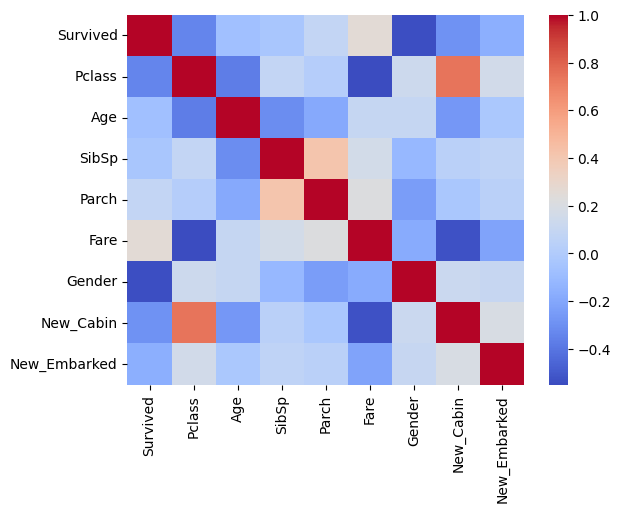

In [177]:
# %%
sns.heatmap(features_train.corr(),cmap="coolwarm")

In [178]:
features_train[features_train['Age'].isna() != False]

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,New_Cabin,New_Embarked
PassengerId,,,,,,,,,
6,0,3,NaN,0,0,8.4583,True,7,1
18,1,2,NaN,0,0,13.0000,True,7,2
20,1,3,NaN,0,0,7.2250,False,7,0
27,0,3,NaN,0,0,7.2250,True,7,0
29,1,3,NaN,0,0,7.8792,False,7,1
...,...,...,...,...,...,...,...,...,...
860,0,3,NaN,0,0,7.2292,True,7,0
864,0,3,NaN,8,2,69.5500,False,7,2
869,0,3,NaN,0,0,9.5000,True,7,2


In [179]:
features_train["Age"].fillna(features_train["Age"].mean(), inplace=True)

/var/folders/y_/lb4bzv095w720brs816sk5080000gn/T/ipykernel_58864/4025526204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_train["Age"].fillna(features_train["Age"].mean(), inplace=True)


In [180]:
features_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,New_Cabin,New_Embarked
PassengerId,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,True,7,2
2,1,1,38.000000,1,0,71.2833,False,2,0
3,1,3,26.000000,0,0,7.9250,False,7,2
4,1,1,35.000000,1,0,53.1000,False,2,2
5,0,3,35.000000,0,0,8.0500,True,7,2
...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,True,7,2
888,1,1,19.000000,0,0,30.0000,False,1,2
889,0,3,29.699118,1,2,23.4500,False,7,2


In [181]:
from sklearn.neighbors import KNeighborsClassifier

In [182]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [183]:
features_train.count()

Survived        891
Pclass          891
Age             891
SibSp           891
Parch           891
Fare            891
Gender          891
New_Cabin       891
New_Embarked    891
dtype: int64

In [184]:
target_train = features_train["Survived"]
target_train.count()

891

In [185]:
features_train =  features_train.drop(columns=["Survived", "New_Cabin", "New_Embarked"])
features_train.head(2)

,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,,,,,,
1,3,22.0,1,0,7.2500,True
2,1,38.0,1,0,71.2833,False


In [186]:
model.fit(features_train, target_train)

KNeighborsClassifier()

In [187]:
import pickle

In [188]:
with open("model.pkl", "wb") as fwriter:
    pickle.dump(model, fwriter)

In [189]:
features_test = test_df.drop(columns=["Name", "Ticket", "Cabin", "Embarked"], axis=1)
features_test

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
892,3,male,34.5,0,0,7.8292
893,3,female,47.0,1,0,7.0000
894,2,male,62.0,0,0,9.6875
895,3,male,27.0,0,0,8.6625
896,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500
1306,1,female,39.0,0,0,108.9000
1307,3,male,38.5,0,0,7.2500


In [190]:
features_test['Gender'] = features_test['Sex'] == 'male'
features_test = features_test.drop("Sex", axis=1)
features_test 


,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,,,,,,
892,3,34.5,0,0,7.8292,True
893,3,47.0,1,0,7.0000,False
894,2,62.0,0,0,9.6875,True
895,3,27.0,0,0,8.6625,True
896,3,22.0,1,1,12.2875,False
...,...,...,...,...,...,...
1305,3,NaN,0,0,8.0500,True
1306,1,39.0,0,0,108.9000,False
1307,3,38.5,0,0,7.2500,True


In [191]:

features_test[features_test['Age'].isna() != False]

,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,,,,,,
902,3,NaN,0,0,7.8958,True
914,1,NaN,0,0,31.6833,False
921,3,NaN,2,0,21.6792,True
925,3,NaN,1,2,23.4500,False
928,3,NaN,0,0,8.0500,False
...,...,...,...,...,...,...
1300,3,NaN,0,0,7.7208,False
1302,3,NaN,0,0,7.7500,False
1305,3,NaN,0,0,8.0500,True


In [192]:
features_test["Age"].fillna(features_test["Age"].mean(), inplace=True)

/var/folders/y_/lb4bzv095w720brs816sk5080000gn/T/ipykernel_58864/3404960035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_test["Age"].fillna(features_test["Age"].mean(), inplace=True)


In [193]:
target_predict = model.predict(features_test)

In [194]:
target_predict

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [195]:
test_target_df

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [196]:
test_target_df_flat = test_target_df.squeeze()
test_target_df_flat

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [199]:
pd.DataFrame({"target_predict":target_predict, "test_target_df":test_target_df_flat}).head(60)

,target_predict,test_target_df
PassengerId,,
892,0,0
893,0,1
894,0,0
895,1,0
896,0,1
897,0,0
898,1,1
899,1,0
900,0,1


In [202]:

r2 = r2_score(test_target_df_flat, target_predict)

print("R² score:", r2)


R² score: -0.34398496240601495


In [203]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_target_df_flat, target_predict)
print("Accuracy:", accuracy)

Accuracy: 0.6889952153110048


In [204]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_target_df_flat, target_predict)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[200  66]
 [ 64  88]]
